# Model Number 1: Using the Title and the Text to Predict the Subreddit

This model will be using the engineered "title_text" column, a concatenation of the title and self text of the post, as the features, and logistic regression as the model. This is the first model of all the notebooks not because it's the first model I produced, but because it is the best performing model. I produced this model after  many other attempts at tuning (including lemmatizing, stemming, different features, and different estimators) which can be seen in notebooks 02 through 04.

The question I'm generally attempting answer is if there is conversations about sustainability happening within communities of academics and this model is most accurate with an accuracy of 94.3%. This model will therefore provide the most concrete answer of yes there is, or no there is not conversation about sustainability happening within communities of academia.

This notebook will have the most details and explanations opposed to the rest.

Happy reading!

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [49]:
df=pd.read_csv('./data/reddit_content_20220228-063053.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,title,selftext,subreddit,created_utc
0,I'm working on my first UX project about reducing food waste and I wanted to conduct a survey about it,"Hi, I know this is annoying but this is my first project. I'm designing an app about using ingredients you already have at home to reduce food waste and to reduce your carbon footprint. It will only take less than 3mins but your answers will make a huge impact on this project!\n\n[https://forms.gle/8T3yXPmZmEKzWSpq7](https://forms.gle/8T3yXPmZmEKzWSpq7)",sustainability,1646023113
1,I’m not quite sure what to say for this but I love the idea. I’m also new here so I apologize if this isn’t appropriate. Just thought I’d share something I thought was neat.,NaN,sustainability,1646021616
2,Self-Sustainable Communities,"Over the past few years, I've been learning a little bit about degraded lands and how to bring them back to usable land again, permaculture and food forests, also mushroom farms, and how to use mycelium to create building material for housing. \n\nIt really seems that there are solutions to live much better and to even help with climate change. More and more people are taking a more sustainable way of living, but if we're not in net 0 in CO2 production, then we're not much better than someone who produces more than us (at least in my opinion but I do see the other side of the argument). \n\nJust imagine going from a degraded land to a food-rich forest with animals and off-grid communities, where a new generation will be raised in working with the land to benefit everybody. There are plenty of permaculture and food forest communities that I came across but it's nowhere near as many we should have to change the way people live or just change the perspective on what is actually possible. Usually, it would be in the government's hands to start some big-scale projects of some sort like China did in a few cases. What would be the alternative way? How can something like this be profitable even after the initial increase of property value so that big investors can be lured in or for anyone who wants to start something like this?",sustainability,1646009146
3,Great Barrier Reef: New Huge Coral Found,NaN,sustainability,1645999683
4,Drying Hands: Blow Drying or Paper Towels,[removed],sustainability,1645997735


### Quick clean up so the model has 0's and 1's being fed into it.

In [50]:
df['subreddit'] = df['subreddit'].replace({'sustainability':1, 'academia':0})

df['title_text'] = df['title'] + ' ' + df['selftext'].fillna('')

X= df['title_text']
y=df['subreddit']

In [51]:
df.head()

,title,selftext,subreddit,created_utc,title_text
0,I'm working on my first UX project about reducing food waste and I wanted to conduct a survey about it,"Hi, I know this is annoying but this is my first project. I'm designing an app about using ingredients you already have at home to reduce food waste and to reduce your carbon footprint. It will only take less than 3mins but your answers will make a huge impact on this project!\n\n[https://forms.gle/8T3yXPmZmEKzWSpq7](https://forms.gle/8T3yXPmZmEKzWSpq7)",1,1646023113,"I'm working on my first UX project about reducing food waste and I wanted to conduct a survey about it Hi, I know this is annoying but this is my first project. I'm designing an app about using ingredients you already have at home to reduce food waste and to reduce your carbon footprint. It will only take less than 3mins but your answers will make a huge impact on this project!\n\n[https://forms.gle/8T3yXPmZmEKzWSpq7](https://forms.gle/8T3yXPmZmEKzWSpq7)"
1,I’m not quite sure what to say for this but I love the idea. I’m also new here so I apologize if this isn’t appropriate. Just thought I’d share something I thought was neat.,NaN,1,1646021616,I’m not quite sure what to say for this but I love the idea. I’m also new here so I apologize if this isn’t appropriate. Just thought I’d share something I thought was neat.
2,Self-Sustainable Communities,"Over the past few years, I've been learning a little bit about degraded lands and how to bring them back to usable land again, permaculture and food forests, also mushroom farms, and how to use mycelium to create building material for housing. \n\nIt really seems that there are solutions to live much better and to even help with climate change. More and more people are taking a more sustainable way of living, but if we're not in net 0 in CO2 production, then we're not much better than someone who produces more than us (at least in my opinion but I do see the other side of the argument). \n\nJust imagine going from a degraded land to a food-rich forest with animals and off-grid communities, where a new generation will be raised in working with the land to benefit everybody. There are plenty of permaculture and food forest communities that I came across but it's nowhere near as many we should have to change the way people live or just change the perspective on what is actually possible. Usually, it would be in the government's hands to start some big-scale projects of some sort like China did in a few cases. What would be the alternative way? How can something like this be profitable even after the initial increase of property value so that big investors can be lured in or for anyone who wants to start something like this?",1,1646009146,"Self-Sustainable Communities Over the past few years, I've been learning a little bit about degraded lands and how to bring them back to usable land again, permaculture and food forests, also mushroom farms, and how to use mycelium to create building material for housing. \n\nIt really seems that there are solutions to live much better and to even help with climate change. More and more people are taking a more sustainable way of living, but if we're not in net 0 in CO2 production, then we're not much better than someone who produces more than us (at least in my opinion but I do see the other side of the argument). \n\nJust imagine going from a degraded land to a food-rich forest with animals and off-grid communities, where a new generation will be raised in working with the land to benefit everybody. There are plenty of permaculture and food forest communities that I came across but it's nowhere near as many we should have to change the way people live or just change the perspective on what is actually possible. Usually, it would be in the government's hands to start some big-scale projects of some sort like China did in a few cases. What would be the alternative way? How can something like this be profitable even after the initial incr

## Baseline

In [52]:
y.value_counts(normalize=True)

0    0.503403
1    0.496597
Name: subreddit, dtype: float64

This model would predict every post to be from the academia subreddit and would be correct 50.3% of the time.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [54]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('log', LogisticRegression(random_state=42))
    
])

In [55]:
#play with different params. trial and error
params = {
     'cvec__stop_words': [None, 'english'],
     'cvec__max_df': [1.0, .75, .5, .25],
     'cvec__binary': [True, False],
     'log__penalty': ['none', 'l2',],
}

gs = GridSearchCV(pipe,
                  param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_) # <- cross val score
gs.best_params_

0.9401680672268908


{'cvec__binary': False,
 'cvec__max_df': 1.0,
 'cvec__stop_words': 'english',
 'log__penalty': 'none'}

In this grid search, I am using a pipeline consisting of count vectorizing which is counting how many times a word/phrase appears within the corpus and therefore binarizing the words of the corpus, and then running that through a logistic regression model. During the grid search, the model is ran multiple times trying out the different parameters provided for both the count vectorizer and the logistic regression model. Once the grid search is finished, I'm able to see what the best accuracy score was that grid searching produced, and the parameters the grid search found that produced that score.

These parameters are the exact same as the second model, but feeding it more data since X is the title _and_ the text of the post. It performs better, but the parameters that provided the best score are different. For example, binary is set to false in this model meaning this model took into account the frequncy the words showed up. This model did not perform any regularization during logistic regression which assisted in reducing the variance as seen below.

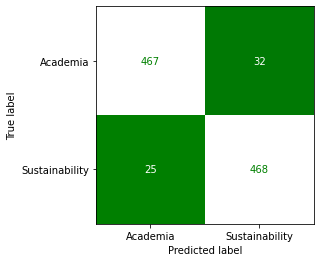

In [56]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['Academia', 'Sustainability'], cmap='ocean', colorbar=False);
plt.savefig('./graphics/model_1_conf_matrix',bbox_inches="tight", dpi=100);


There are 32 false positives and 25 false negatives for a total of 57 false predictions. These 57 misclassifications will be explored further below.

This model struggles more with predicting Sustainability than it does at predicting Academia, however, but not by a large margin.

In [57]:
#source: code from Tori Powers
trainscore = gs.score(X_train, y_train)
testscore = gs.score(X_test, y_test)
crossval = cross_val_score(gs, X_train, y_train).mean()
pred = gs.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()
recall = metrics.recall_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
accuracy = testscore
specificity = tn / (tn + fp)

print (f'Train Score = {trainscore}')
print (f'Test Score = {testscore}')
print (f'Cross Val Score = {crossval}')
print (f'Accuracy Score = {testscore}')
print (f'Recall Score = {recall}')
print (f'Precision Score = {precision}')
print (f'Specificity Score = {specificity}')

Train Score = 0.9996638655462184
Test Score = 0.9425403225806451
Cross Val Score = 0.9357983193277312
Accuracy Score = 0.9425403225806451
Recall Score = 0.949290060851927
Precision Score = 0.936
Specificity Score = 0.935871743486974


There is some variance and overfitting in this model as seen with a train score of 99.9%, a test score of 94.3%, and a cross val of 93.6%. While I would expect that giving the model less features, which would mean less text, would introduce some bias and therefore reduce variance, as seen in notebook "02_model", actually giving the model less text increased the variance.

While there is some variance and overfitting present, because the cross val score and test score are so similar, this is still a very solid model at 94.3% accurate.

In [58]:
coefs = pd.DataFrame(pd.Series(gs.best_estimator_.named_steps['log'].coef_[0], index = gs.best_estimator_.named_steps['cvec'].get_feature_names()).sort_values(ascending = False))
coefs.head(10)

,0
sustainable,58.510156
sustainability,54.289252
plastic,37.328896
change,30.331387
green,28.471360
climate,28.054080
energy,27.142198
water,26.038183
environmental,24.579373
waste,22.732393


This data frame is showing which features/tokens had the greatest effect on the model predicting the post to be in Sustainabilty, the positive class. It makes complete sense for these top ten words to have the highest effect on the model as any human would read these words and also conclude the conversation in concercing sustainability.

In [59]:
coefs.tail(10)

,0
masses,-26.376153
hit,-27.193808
dissertation,-27.478596
science,-29.026406
journal,-29.880476
journals,-33.735196
phd,-38.407119
articles,-42.850538
academia,-43.777205
academic,-48.162945


This dataframe is showing the words/tokens that had to highest effect on the model deciding the post did __not__ belong to the Sustainability subreddit. These words are highly academic and definitely associated with belonging to higher education. It's intuitive for the model, as well as any human, to believe these words to be top predictors to belonging in the Academia subreddit

In [60]:
X_test[y_test != pred].head()

3136    What are good methods of observation to avoid self-reporting bias in interviews? My project has to do with sustainable fashion consumption. I have come across this problem that respondents say they care for the environment or say they are shopping/using/discarding clothes in an ecofriendly way but they don’t. \nWhat could be an experimental/observational design to measure real behavior? Fake shopping experiment? Observing people when they shop? \n\nI am grateful for any input :)
347                                                                                                                                                                                                                                                           For those of you who switched to a bidet, was it difficult to switch to it? Is there a model you guys would suggest? Did it really decrease your toilet paper use? Was it difficult to install? Do you find it to be inconvenient in any way?
1404            

These posts were classified as belonging incorrectly to their subreddits. There are 57 misclassified posts, the least of all the other models. 

#### The dataframe below shows the feature, title_text, the subreddit the post actually belonged to and where it was predicted to belong to, the probability the logistic regression model calculated to determine which subreddit the post belonged to, and the margin of unsureness represented in the difference of the two probabilities. This data frame is the correct and icncorrect predictions of the test set.

In [61]:
preds_df = pd.DataFrame({
    'title_text' : X_test, 
    'actual' : y_test, 
    'predicted' : gs.predict(X_test),
    'P(r/Academia)' : [i[0] for i in gs.predict_proba(X_test)],
    'P(r/Sustainability)' : [i[1] for i in gs.predict_proba(X_test)]})
preds_df['Prob Diff'] = np.abs(preds_df['P(r/Sustainability)'] - preds_df['P(r/Academia)'])
preds_df

,title_text,actual,predicted,P(r/Academia),P(r/Sustainability),Prob Diff
3808,"Grad international students in new country I am an international student doing my Ph.D. in the US. I´ve been here for 3 years, and I don't feel like I can fit with most of my peers.\n\nWhen I came for the first time to my department, and specifically to my lab, I met three women that were doing their Ph.D., and they were all international students. I would say that that was one of my motivations to join the lab, they seemed happy and I felt represented (even if no one was from my continent lol). Now, they are gone, and each year there are more American students in the department, and please don't get me wrong, they are great people, it´s just that we do not have anything in common, when we are together I do not speak much because I can't have an opinion in many things (like politics), or they do not have an opinion in my things, or they seem a little upset when I take my time speaking because I am not fluent yet.\n\nAlso, from the beginning, and not just in my department, I noticed that there exist two groups of friends: international students and Americans. Some international students join the American group, but most of them had a privileged life before coming to the US. I have spoken with some international students that also feel the same about this. Some phrases stayed in my head because I can relate to some of them. One of them said ""I feel like people here hate me"", another told me ""I am not sure, but I feel like some of them think that I am not capable of speak with them"", and another one said, ""I feel more discriminated here because I am Latina than because I am a woman"". \n\nI cannot avoid feeling a little rejected, and I know that no one is doing anything wrong we are just different. But every year fewer international students come (I guess covid is a reason) and the friends that I use to have are not here anymore. \n\nI was wondering what people think? If you are an international student have you feel this way? Have you done something that improved your relationships with your peers? Also, as a student in your native country interacting with foreign students what do you think about it?",0,0,1.000000e+00,2.651743e-129,1.0
494,Solarpunk: The Power of an Aesthetic,1,1,1.918850e-09,1.000000e+00,1.0
3765,Revisiting: Balancing Author Satisfaction with Reviewer Needs.,0,0,9.999999e-01,1.257245e-07,1.0
1181,Clean Water... 4Earth,1,1,0.000000e+00,1.000000e+00,1.0
2287,"Paying for co-authorship Has anyone else gotten emails like this? It seems like a new low...\n\n\nDear Researchers,\n\nWe are pleased to invite the researchers in various fields who are interested to be co-Authors on high level papers in reputable publishers such as: \n\n \n\nWiley, Elsevier, Taylor &amp; Francis, IEEE, Springer\n\n \n\nTo send the phone number on whats app or emails, and their research interests, to share the available title, abstract of papers and the possible postions.\n\nOur Whatsapp number: +989128883548\n\nAll papers are published in journals with impact factor and Q1 or Q2 rank on scimago.\n\nBest regards\n\n \n\nFor example after send information to us will be send under information by whats app to you according your fields :\n\nJournal names :\n\nLink web site :\n\nLink on SJR(scimagojr.com):\n\nLINK WOS (https://mjl.clarivate.com/):\n\nPosition available with price that (price per position will be define according publisher , Q on SJR and impact factor then is between 100-800 USD )\n\nIMPORTANT ISSUES : about all position then available after book just need send information authors and academic address and up to online not need pay even 1 USD and you should be pay payment of position then booked by you up to maximum 7 days after send link online and pdf of paper to you\n\nBest regards",0,0,1.000000e+00,7.264652e-178,1.0
...,...,...,...,...,...,...
2695,Don’t you just enjoy when predatory journals spam your email?,0,0,1.000000e+00,4.697393e-21,1.0
19

#### The dataframe below shows the feature, title_text, the subreddit the post actually belonged to and where it was predicted to belong to, the probability the logistic regression model calculated to determine which subreddit the post belonged to, and the margin of unsureness represented in the difference of the two probabilities. This data frame is only the incorrect predictions of the test set.

In [62]:
pd.set_option('display.max_colwidth', None)
wrong_preds_df = preds_df[preds_df['actual']!=preds_df['predicted']]
very_wrong_preds_df = wrong_preds_df[wrong_preds_df['Prob Diff']>0.5]
very_wrong_preds_df

,title_text,actual,predicted,P(r/Academia),P(r/Sustainability),Prob Diff
3136,What are good methods of observation to avoid self-reporting bias in interviews? My project has to do with sustainable fashion consumption. I have come across this problem that respondents say they care for the environment or say they are shopping/using/discarding clothes in an ecofriendly way but they don’t. \nWhat could be an experimental/observational design to measure real behavior? Fake shopping experiment? Observing people when they shop? \n\nI am grateful for any input :),0,1,0.000000e+00,1.000000e+00,1.000000
347,"For those of you who switched to a bidet, was it difficult to switch to it? Is there a model you guys would suggest? Did it really decrease your toilet paper use? Was it difficult to install? Do you find it to be inconvenient in any way?",1,0,1.000000e+00,2.509327e-16,1.000000
1404,Review - Path to Extinction or Path to a Livable Future?,1,0,8.337538e-01,1.662462e-01,0.667508
1904,Science Based Target consulting quotation I am looking for some quotation range for a consultation for a company to set a science based target. Any price range to set strategies for GHG emission reduction would be great or even how much a price for calculating Scope 1 2 3.,1,0,9.999998e-01,1.883629e-07,1.000000
3559,Humanity in the 21st century.,0,1,6.271816e-08,9.999999e-01,1.000000
2853,"University of Nebraska-Lincoln Psychology Research Study Help out for a class project by participating in a survey about how people make decisions. The survey should take less than 10 minutes, and you must be on a computer (not a phone or tablet). To participate, go to [https://ssp.qualtrics.com/jfe/form/SV\_3eHpUbjylAyXStM](https://ssp.qualtrics.com/jfe/form/SV_3eHpUbjylAyXStM). \nThanks!",0,1,0.000000e+00,1.000000e+00,1.000000
992,"China’s population to peak in 2021 as demographic turning point has already arrived, threatening to disrupt Beijing’s economic ambitions",1,0,9.999591e-01,4.094880e-05,0.999918
3497,I'm Leaving....Now What? [removed],0,1,5.560829e-06,9.999944e-01,0.999989
1633,Natural Dyes Hey! \n\nDoes anyone know anything about natural dyes. In particular bacteria pigmentation. Im conducting primary research for my University project titled Futures and Innovations.\n\nThanks,1,0,1.000000e+00,1.847316e-31,1.000000
2982,I need 3 people for my study [removed],0,1,1.288238e-10,1.000000e+00,1.000000


#### The below dataframe sorts the previous dataframe with the first posts being the ones the model felt most sure about, but was wrong.

In [63]:
wrong_preds_df.sort_values(by='Prob Diff', ascending=False).head()

,title_text,actual,predicted,P(r/Academia),P(r/Sustainability),Prob Diff
3136,What are good methods of observation to avoid self-reporting bias in interviews? My project has to do with sustainable fashion consumption. I have come across this problem that respondents say they care for the environment or say they are shopping/using/discarding clothes in an ecofriendly way but they don’t. \nWhat could be an experimental/observational design to measure real behavior? Fake shopping experiment? Observing people when they shop? \n\nI am grateful for any input :),0,1,0.0,1.000000e+00,1.0
1622,"Computer science college student interested in volunteering My nephew is in his final year of engineering school computer science program. He expressed an interest in part-time volunteering role at a clean-tech organization that could leverage his skills in developing software. I’ve encouraged him to explore clean-tech as a field instead of Fintech, the field he has some internship experience. I watched this[RE: Tv show](https://www.re-tv.org/) on Prime and thought there has to be global not-for-profit organizations that could leverage his skill sets.\n\nI have two nieces who are also studying computer science. I am nudging them to find volunteer roles in clean-tech fields so they develop an interest and hopefully go on to work in that sectors after graduating. They however are looking to apply their CS knowledge, not just any role. For context, they are all located in Mumbai, India. Hope this post is okay. Thanks for any help and advice. \n\nAny ideas are greatly appreciated.",1,0,1.0,2.347582e-82,1.0
2899,"Indigenous sidlined on how to handle climate change at COP26 | Academia prefers to preach to the choir, always with their back to the congregation for a sermon that'd rather not start [https://www.theguardian.com/environment/2021/nov/16/indigenous-climate-activists-cop26-endangers-native-communities](https://www.theguardian.com/environment/2021/nov/16/indigenous-climate-activists-cop26-endangers-native-communities)\n\nIt aggravates me how the academic community feels above collaborating with Indigenous people who've lived and cared on the land COP26- its the worst form of snobbery against the layman I've ever seen come from academia! They'd rather talk to those who give ""proper recognition"", like Joe Biden fell asleep as *“this is one of the most important meetings in history. You have the chance to make decisions and reach agreements that will affect the lives of generations to come. You are in a position of extraordinary power you can change the trajectory that we are on…”* and multinational corporations who dump their R&amp;D costs onto public universities and neg them the rest of the way. \n\nCareerists seeking self-aggrandizement threaten not only the ""prestige of the profession"", but the whole world!",0,1,0.0,1.000000e+00,1.0
1900,"So TIL that saying, ""No"" when asked, ""Do you want a receipt?"", doesn't stop a receipt from being printed. So I will occasionally get fast food via drive-thru. Well whenever they asked me if I want a receipt, I say no because in my head I'm not wasting any extra paper. Turns out, I haven't saved or achieved a singular thing by saying no. \n\nWhile I was waiting on my food, the window lady and got to talking and I mentioned not seeing the point of a receipt because Imma just toss it anyways so why use the paper. She then says, ""Well maybe it's for the points?"", and shows me my receipt with a barcode. \n\n""So wait....a receipt is still printed even tho I said No?""\n\n""Oh yea, the computer does it on its own. We gotta ask via policy but really it's just who is gonna crumble it up ya know?""\n\n""Well...this whole time I thought I was saving paper. Now I learn it was all for nothing.""\n\n""*Laughs*""\n\n""*internal crying, external laughter*""",1,0,1.0,2.117762e-40,1.0
454,Scientific Journal Megathread - by subject,1,0,1.0,2.533142e-17,1.0


This data frame provides a wealth of insight into my problem statement. The words that I would expect to see in these misclassifications are:
- like
- just
- know
- good
- want
- really
- https
- amp
- people
- new
- make
- world


I would expect to see these words because as shown in initial EDA, these words occur fairly frequently in both subreddits and could therefore lead to misclassifications. However, I recognize that these words are fairly simple words you could find in any post about any topic.

#### This dataframe is going to show the misclassified posts that contain the frequent words from both subreddits

In [64]:
wrong_preds_df.loc[wrong_preds_df['title_text'].str.contains('like|just|know|good|want|really|https|amp|people|new|make|world', case=False)].head()
#looking to see if these misclassifications contain words found in both sustainability and academia

,title_text,actual,predicted,P(r/Academia),P(r/Sustainability),Prob Diff
3136,What are good methods of observation to avoid self-reporting bias in interviews? My project has to do with sustainable fashion consumption. I have come across this problem that respondents say they care for the environment or say they are shopping/using/discarding clothes in an ecofriendly way but they don’t. \nWhat could be an experimental/observational design to measure real behavior? Fake shopping experiment? Observing people when they shop? \n\nI am grateful for any input :),0,1,0.000000e+00,1.000000e+00,1.0
347,"For those of you who switched to a bidet, was it difficult to switch to it? Is there a model you guys would suggest? Did it really decrease your toilet paper use? Was it difficult to install? Do you find it to be inconvenient in any way?",1,0,1.000000e+00,2.509327e-16,1.0
2853,"University of Nebraska-Lincoln Psychology Research Study Help out for a class project by participating in a survey about how people make decisions. The survey should take less than 10 minutes, and you must be on a computer (not a phone or tablet). To participate, go to [https://ssp.qualtrics.com/jfe/form/SV\_3eHpUbjylAyXStM](https://ssp.qualtrics.com/jfe/form/SV_3eHpUbjylAyXStM). \nThanks!",0,1,0.000000e+00,1.000000e+00,1.0
1633,Natural Dyes Hey! \n\nDoes anyone know anything about natural dyes. In particular bacteria pigmentation. Im conducting primary research for my University project titled Futures and Innovations.\n\nThanks,1,0,1.000000e+00,1.847316e-31,1.0
2982,I need 3 people for my study [removed],0,1,1.288238e-10,1.000000e+00,1.0


I can see that out of the 57 misclassified posts, 23 of them do contain words that are found frequently in both subreddits. However, all of these are fairly generalized words that don't have specific meanings in either academia in general, or sustainability in general. 

<br>

In addition to the words found in initial EDA, the following words had the highest effect on the model as seen in the coefficients above:
- sustainable
- sustainability
- plastic
- change
- green
- climate
- energy
- water
- environmental

If I add these words to the previous list of common EDA words, 2 more posts are identified as having common language.

In [65]:
wrong_preds_df.loc[wrong_preds_df['title_text'].str.contains(
    'like|just|know|good|want|really|https|amp|people|new|make|world|sustainable|sustainability|plastic|change|green|climate|energy|water|environmental', 
    case=False)]

,title_text,actual,predicted,P(r/Academia),P(r/Sustainability),Prob Diff
3136,What are good methods of observation to avoid self-reporting bias in interviews? My project has to do with sustainable fashion consumption. I have come across this problem that respondents say they care for the environment or say they are shopping/using/discarding clothes in an ecofriendly way but they don’t. \nWhat could be an experimental/observational design to measure real behavior? Fake shopping experiment? Observing people when they shop? \n\nI am grateful for any input :),0,1,0.000000e+00,1.000000e+00,1.000000
347,"For those of you who switched to a bidet, was it difficult to switch to it? Is there a model you guys would suggest? Did it really decrease your toilet paper use? Was it difficult to install? Do you find it to be inconvenient in any way?",1,0,1.000000e+00,2.509327e-16,1.000000
2853,"University of Nebraska-Lincoln Psychology Research Study Help out for a class project by participating in a survey about how people make decisions. The survey should take less than 10 minutes, and you must be on a computer (not a phone or tablet). To participate, go to [https://ssp.qualtrics.com/jfe/form/SV\_3eHpUbjylAyXStM](https://ssp.qualtrics.com/jfe/form/SV_3eHpUbjylAyXStM). \nThanks!",0,1,0.000000e+00,1.000000e+00,1.000000
1633,Natural Dyes Hey! \n\nDoes anyone know anything about natural dyes. In particular bacteria pigmentation. Im conducting primary research for my University project titled Futures and Innovations.\n\nThanks,1,0,1.000000e+00,1.847316e-31,1.000000
2982,I need 3 people for my study [removed],0,1,1.288238e-10,1.000000e+00,1.000000
2595,"Motivação - Você quer vencer, então lute por isso! [https://youtu.be/FQpSyknIdLw](https://youtu.be/FQpSyknIdLw)\n\n&amp;#x200B;\n\nhttps://preview.redd.it/xlvkcbn7nd681.jpg?width=480&amp;format=pjpg&amp;auto=webp&amp;s=ef30d3107165a389e83e2dca43f65c7ac816a913",0,1,1.149396e-10,1.000000e+00,1.000000
3492,People a long time ago Old man Logo,0,1,3.574918e-13,1.000000e+00,1.000000
2749,Expectation vs Reality &amp;#x200B;\n\nhttps://preview.redd.it/0t47n43ka1381.png?width=714&amp;format=png&amp;auto=webp&amp;s=29b58b9c0f57f1bce32446f03c6faed10e4953e3,0,1,1.623390e-11,1.000000e+00,1.000000
1900,"So TIL that saying, ""No"" when asked, ""Do you want a receipt?"", doesn't stop a receipt from being printed. So I will occasionally get fast food via drive-thru. Well whenever they asked me if I want a receipt, I say no because in my head I'm not wasting any extra paper. Turns out, I haven't saved or achieved a singular thing by saying no. \n\nWhile I was waiting on my food, the window lady and got to talking and I mentioned not seeing the point of a receipt because Imma just toss it anyways so why use the paper. She then says, ""Well maybe it's for the points?"", and shows me my receipt with a barcode. \n\n""So wait....a receipt is still printed even tho I said No?""\n\n""Oh yea, the computer does it on its own. We gotta ask via policy but really it's just who is gonna crumble it up ya know?""\n\n""Well...this whole time I thought I was saving paper. Now I learn it was all for nothing.""\n\n""*Laughs*""\n\n""*internal crying, external laughter*""",1,0,1.000000e+00,2.117762e-40,1.000000
3380,Let's change the culture!,0,1,1.776357e-15,1.000000e+00,1.000000


The below code attempted to look at the most common words in all of the misclassified posts, but the results were inconclusive.

In [66]:
# import pandas as pd
# import nltk
# import re
# import string
# from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')
# from nltk.tokenize import word_tokenize

# stop_words = stopwords.words()

# def cleaning(text):        
#     # converting to lowercase, removing URL links, special characters, punctuations...
#     text = text.lower()
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('[’“”…]', '', text)     

#     # removing the stop-words          
#     text_tokens = word_tokenize(text)
#     tokens_without_sw = [word for word in text_tokens if not word in stop_words]
#     filtered_sentence = (" ").join(tokens_without_sw)
#     text = filtered_sentence
    
#     return text

# dt = very_wrong_preds_df['title_text'].apply(cleaning)

# from collections import Counter
# p = Counter(" ".join(dt).split()).most_common(20)
# rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
# print(rslt)

# Evaluation

This model, with provides the most concrete evidence that yes, conversations about sustainability _are_ happening within communities of academia. Lets look at a single post that the model was _certain_ belonged to Sustainability , but actually belonged to Academia:

>What are good methods of observation to avoid self-reporting bias in interviews? My project has to do with sustainable fashion consumption. I have come across this problem that respondents say they care for the environment or say they are shopping/using/discarding clothes in an ecofriendly way but they don’t. \nWhat could be an experimental/observational design to measure real behavior? Fake shopping experiment? Observing people when they shop? \n\nI am grateful for any input :)

Looking at this post, I, as any human would, see words such as sustainable, environment, and ecofriendly and would immediately say, "This post has to do with being sustainable!" However, this post is with Academia. The model surely misclassified it because the word "sustainable" has the highest weight on predicting that a post belongs to Sustainability, but that only confirms that these conversations are happening.

In [67]:
coefs.tail(10)

,0
masses,-26.376153
hit,-27.193808
dissertation,-27.478596
science,-29.026406
journal,-29.880476
journals,-33.735196
phd,-38.407119
articles,-42.850538
academia,-43.777205
academic,-48.162945
